In [165]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [339]:
X_df = pd.read_csv("Training Data/Logistic_X_Train.csv")
Y_df = pd.read_csv("Training Data/Logistic_Y_Train.csv")

In [340]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      3000 non-null   float64
 1   f2      3000 non-null   float64
 2   f3      3000 non-null   float64
dtypes: float64(3)
memory usage: 70.4 KB


In [341]:
Y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   3000 non-null   int64
dtypes: int64(1)
memory usage: 23.6 KB


In [342]:
Y_df.head()

,label
0,1
1,1
2,1
3,0
4,0


In [343]:
# train test split
X, Y = X_df.values[:2500], Y_df.values[:2500]
Xt, Yt = X_df.values[2500:], Y_df.values[2500:]

In [344]:
np.unique(Y)

array([0, 1], dtype=int64)

# Logistic Regression

In [153]:
class LogisticRegression:
    def __init__(self, X, Y):
        """
        params; X: training independent features
        params; Y: training dependent feature/label
        """
        self.X = np.hstack((np.ones((X.shape[0], 1)), X)) # stacking vector of 1 for W0 (bias) to each sample
        self.Y = Y
        self.W = np.random.randn(self.X.shape[1], 1)
        self.loss = []
        self.acc = []
        self.val_loss = []
        self.val_acc = []
    
    def sigmoid(self, Y):
        return 1.0 / (1.0 + np.exp(-Y))
        
    def predict(self, X):
        # this is Y hypothesis
        Yhypo = np.matmul(X, self.W)
        Yp = self.sigmoid(Yhypo)
        return Yp
        
    def binary_cross_entropy(self, Y, Yp):
        l = np.mean(Y*np.log(Yp) + (1-Y)*np.log(1-Yp))
        return -1.0 * l
    
    def accuracy(self, Y, Yp):
        """
        params; Y: actual label with value 0 or 1
        params; Yp: predicted prob with value between 0 and 1 for label 1
        """
        Yp_label = np.array(Yp > 0.5)
        a = np.mean(Yp_label == Y)
        return a
    
    def gradient(self, X, Y):
        Yp = self.predict(X)
        return np.matmul(X.T, (Yp-Y))
        
    def train(self, learning_rate=0.001, epochs=40, batch_size=200, vsplit=0.2):
        """
        func desc; this function trains the model over dataset 
        """
        # training and validation split
        no_of_samples = self.X.shape[0]
        split_idx = int(no_of_samples * (1 - vsplit))
        
        Xt, Yt = self.X[ : split_idx], self.Y[ : split_idx]
        Xv, Yv = self.X[split_idx : ], self.Y[split_idx : ]
        
        no_of_batches = int(Xt.shape[0]/batch_size)
        for i in range(epochs):
            # shuffle training data on every epoch to avoid residual samples
            train_data = list(zip(Xt, Yt)) # zip can only shuffle list ig
            np.random.shuffle(train_data)
            Xt_tupple, Yt_tupple = zip(*train_data) # unzip the shuffle train data
            Xt, Yt = np.asarray(Xt_tupple), np.asarray(Yt_tupple)
            
            for j in range(no_of_batches):
                
                Xt_batch = Xt[j*batch_size: (j+1)*batch_size]
                Yt_batch = Yt[j*batch_size: (j+1)*batch_size]
                
                Ytp_batch = self.predict(Xt_batch)
                
                self.W = self.W - learning_rate * self.gradient(Xt_batch, Yt_batch)
                
                self.loss.append(self.binary_cross_entropy(Yt_batch, Ytp_batch))
                self.acc.append(self.accuracy(Yt_batch, Ytp_batch))
                
                Yvp = self.predict(Xv)
                self.val_loss.append(self.binary_cross_entropy(Yv, Yvp))
                self.val_acc.append(self.accuracy(Yv, Yvp))
                
                print("epoch: {}/{} |acc: {:.3f} |val_acc: {:.3f} |loss: {:.3f} |val_loss: {:.3f}".format(i, 
                                                                           j, 
                                                                           self.acc[len(self.acc)-1],
                                                                           self.val_acc[len(self.val_acc)-1],
                                                                           self.loss[len(self.loss)-1],
                                                                           self.val_loss[len(self.val_loss)-1]
                                                                          ))

In [154]:
lr = LogisticRegression(X, Y)

In [155]:
lr.train()

epoch: 0/0 |acc: 0.335 |val_acc: 0.390 |loss: 1.040 |val_loss: 0.949
epoch: 0/1 |acc: 0.405 |val_acc: 0.462 |loss: 0.936 |val_loss: 0.846
epoch: 0/2 |acc: 0.450 |val_acc: 0.534 |loss: 0.836 |val_loss: 0.761
epoch: 0/3 |acc: 0.535 |val_acc: 0.596 |loss: 0.787 |val_loss: 0.688
epoch: 0/4 |acc: 0.670 |val_acc: 0.648 |loss: 0.624 |val_loss: 0.633
epoch: 0/5 |acc: 0.640 |val_acc: 0.696 |loss: 0.619 |val_loss: 0.579
epoch: 0/6 |acc: 0.715 |val_acc: 0.740 |loss: 0.551 |val_loss: 0.536
epoch: 0/7 |acc: 0.785 |val_acc: 0.758 |loss: 0.485 |val_loss: 0.502
epoch: 0/8 |acc: 0.805 |val_acc: 0.784 |loss: 0.441 |val_loss: 0.471
epoch: 0/9 |acc: 0.855 |val_acc: 0.794 |loss: 0.389 |val_loss: 0.444
epoch: 1/0 |acc: 0.760 |val_acc: 0.810 |loss: 0.467 |val_loss: 0.419
epoch: 1/1 |acc: 0.855 |val_acc: 0.822 |loss: 0.390 |val_loss: 0.396
epoch: 1/2 |acc: 0.830 |val_acc: 0.836 |loss: 0.395 |val_loss: 0.377
epoch: 1/3 |acc: 0.855 |val_acc: 0.844 |loss: 0.341 |val_loss: 0.360
epoch: 1/4 |acc: 0.865 |val_acc: 0

epoch: 14/0 |acc: 0.985 |val_acc: 0.982 |loss: 0.085 |val_loss: 0.092
epoch: 14/1 |acc: 0.975 |val_acc: 0.982 |loss: 0.066 |val_loss: 0.092
epoch: 14/2 |acc: 0.975 |val_acc: 0.982 |loss: 0.085 |val_loss: 0.091
epoch: 14/3 |acc: 0.965 |val_acc: 0.982 |loss: 0.103 |val_loss: 0.091
epoch: 14/4 |acc: 0.980 |val_acc: 0.982 |loss: 0.091 |val_loss: 0.091
epoch: 14/5 |acc: 0.990 |val_acc: 0.982 |loss: 0.074 |val_loss: 0.090
epoch: 14/6 |acc: 0.980 |val_acc: 0.982 |loss: 0.080 |val_loss: 0.090
epoch: 14/7 |acc: 0.960 |val_acc: 0.982 |loss: 0.107 |val_loss: 0.090
epoch: 14/8 |acc: 0.985 |val_acc: 0.982 |loss: 0.076 |val_loss: 0.089
epoch: 14/9 |acc: 0.990 |val_acc: 0.982 |loss: 0.069 |val_loss: 0.089
epoch: 15/0 |acc: 0.980 |val_acc: 0.982 |loss: 0.078 |val_loss: 0.089
epoch: 15/1 |acc: 0.975 |val_acc: 0.982 |loss: 0.077 |val_loss: 0.088
epoch: 15/2 |acc: 0.990 |val_acc: 0.982 |loss: 0.081 |val_loss: 0.088
epoch: 15/3 |acc: 0.985 |val_acc: 0.982 |loss: 0.080 |val_loss: 0.088
epoch: 15/4 |acc: 0.

epoch: 27/9 |acc: 0.990 |val_acc: 0.988 |loss: 0.074 |val_loss: 0.067
epoch: 28/0 |acc: 0.985 |val_acc: 0.988 |loss: 0.054 |val_loss: 0.067
epoch: 28/1 |acc: 0.995 |val_acc: 0.988 |loss: 0.048 |val_loss: 0.067
epoch: 28/2 |acc: 0.980 |val_acc: 0.988 |loss: 0.068 |val_loss: 0.067
epoch: 28/3 |acc: 0.980 |val_acc: 0.988 |loss: 0.074 |val_loss: 0.067
epoch: 28/4 |acc: 0.995 |val_acc: 0.988 |loss: 0.064 |val_loss: 0.067
epoch: 28/5 |acc: 0.990 |val_acc: 0.988 |loss: 0.058 |val_loss: 0.066
epoch: 28/6 |acc: 0.985 |val_acc: 0.988 |loss: 0.086 |val_loss: 0.066
epoch: 28/7 |acc: 0.975 |val_acc: 0.988 |loss: 0.071 |val_loss: 0.066
epoch: 28/8 |acc: 0.995 |val_acc: 0.988 |loss: 0.040 |val_loss: 0.066
epoch: 28/9 |acc: 0.995 |val_acc: 0.988 |loss: 0.037 |val_loss: 0.066
epoch: 29/0 |acc: 0.990 |val_acc: 0.988 |loss: 0.048 |val_loss: 0.066
epoch: 29/1 |acc: 0.995 |val_acc: 0.988 |loss: 0.056 |val_loss: 0.066
epoch: 29/2 |acc: 0.995 |val_acc: 0.988 |loss: 0.041 |val_loss: 0.066
epoch: 29/3 |acc: 0.

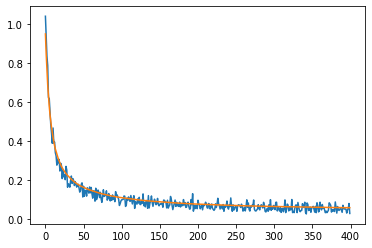

In [156]:
plt.plot(lr.loss)
plt.plot(lr.val_loss)
plt.show()

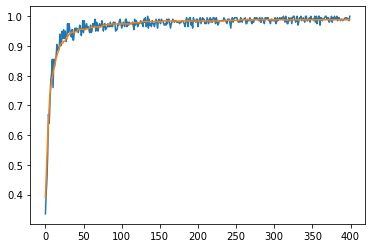

In [157]:
plt.plot(lr.acc)
plt.plot(lr.val_acc)
plt.show()

In [161]:
# predict label from logistic regression
W0_Xt = np.hstack((np.ones((Xt.shape[0], 1)), Xt))
Yp_lr = (lr.predict(W0_Xt) > 0.5)

# Support Vector Machine

In [361]:
class SVM:
    def __init__(self, X, Y):
        self.X = X
        self.Y = np.where(Y==0, -1, 1).reshape((-1, ))
        self.W = np.random.randn(X.shape[1], )
        self.b = 0
        self.loss = []
        self.acc = []
        self.val_loss = []
        self.val_acc = []
        
    def decision_vector(self, X, Y):
        """
        func desc; it calculates vector [0      if t[i] >= 1]
                                        [1-t[i] if t[i] <  1]
                                        where, t[i] = y[i] * (W.T * X[i] + b)
        return; t vector: shape(no_of_samples, )
        """
        # calculate t vector
        t = Y * (np.matmul(X, self.W) + self.b)
        dv = np.where(t>=1, 0, 1-t)
        return dv
        
    def hinge_loss(self, X, Y, c):
        """
        formula; L = 1/2 * W.T * W + c summation max(0, 1-t[i])
        params; c: penality applied to the error/outliers
        return; loss: it is a scalar value
        """
        #dv = 
        l = (0.5 * np.matmul(self.W.T, self.W)) + (c * np.sum(self.decision_vector(X, Y)) )
        return l
    
    def predict(self, X):
        '''
        Y = WX + b
        '''
        Yhypo = np.dot(X, self.W) + self.b
        Yp = np.where(Yhypo>0, 1, -1)
        return Yp
    
    def accuracy(self, X, Y):
        Yp = self.predict(X)
        acc = np.mean(Yp == Y)
        return acc
        
    def delta_Lw(self, X, Y, c):
        """
        func desc; computes partial derivative of hinge loss over W
        formula; dL/dW = W + (c * 
                              summation(Y[i] * 
                                        W.T * 
                                        {o if 1-t[i] <=0
                                         1 if 1-t[i] > 1}
                                        )
                              )
                              where 1-t[i] was previously calculated as decision vector
        return; delta_L over W: shape is same as W (no_of_feature, )
        """
        dv = self.decision_vector(X, Y) # decision vector
        delta_dv = np.where(dv>0, -1, 0)
        dW = self.W + (c * np.sum((delta_dv * Y * X.T), axis=1) )
        return dW
    
    def delta_Lb(self, X, Y, c):
        """
        func desc; compute partial derivative of hinge loss over b
        formula; dL/db = c * summation(Y[i] * {o if 1-t[i] <=0,
                                               1 if 1-t[i] > 1}
                                        )
                                        where 1-t[i] was previously calculated as decision vector
        return; delta L over b: scalar unit
        """
        dv = self.decision_vector(X, Y)
        delta_dv = np.where(dv>0, -1, 0)
        db = c * np.sum(delta_dv * Y)
        return db
    
    def train(self, penalty=5, learning_rate = 0.001, epochs=50, batch_size=150, vsplit=0.2):
        """
        func desc; trains the model
        """
        #return self.Y
        no_samples = self.X.shape[0]
        no_batches = int(no_samples/batch_size)
        vsplit_idx = int(no_samples * vsplit)
        X, Y = self.X[:vsplit_idx], self.Y[:vsplit_idx]
        Xv, Yv = self.X[vsplit_idx:], self.Y[vsplit_idx:]
        
        for i in range(epochs):
            # shuffle train data
            data = list(zip(X, Y))
            np.random.shuffle(data)
            X, Y = zip(*data)
            X, Y = np.asarray(X), np.asarray(Y)
            
            for j in range(no_batches):
                X_batch = X[j*batch_size: (j+1)*batch_size]
                Y_batch = Y[j*batch_size: (j+1)*batch_size]
                
                self.W = self.W - learning_rate * self.delta_Lw(X_batch, Y_batch, penalty)
                self.b = self.b - learning_rate * self.delta_Lb(X_batch, Y_batch, penalty)
                
                train_loss = self.hinge_loss(X_batch, Y_batch, penalty)
                train_acc = self.accuracy(X_batch, Y_batch)
                self.loss.append(train_loss)
                self.acc.append(train_acc)
                
                validation_loss = self.hinge_loss(Xt, Yt, penalty)
                validation_acc = self.accuracy(Xt, Yt)
                self.val_loss.append(validation_loss)
                self.val_acc.append(validation_acc)
                
                print("Epochs: {}/{} |loss: {:.3f} |val_loss: {:.3f} |acc: {:.3f} |val_acc: {:.3f}".format(i, 
                                                                                                           j, 
                                                                                                           train_loss, 
                                                                                                           validation_loss,
                                                                                                           train_acc,
                                                                                                           validation_acc
                                                                                                          ))
                
        return 

In [362]:
svc_model = SVM(X, Y)

In [363]:
svc_model.train()

Epochs: 0/0 |loss: 72.792 |val_loss: 1462357.943 |acc: 0.987 |val_acc: 0.296
Epochs: 0/1 |loss: 112.732 |val_loss: 1503166.869 |acc: 0.933 |val_acc: 0.301
Epochs: 0/2 |loss: 91.058 |val_loss: 1526729.656 |acc: 0.947 |val_acc: 0.302
Epochs: 0/3 |loss: 25.975 |val_loss: 1530445.554 |acc: 0.980 |val_acc: 0.302
Epochs: 0/4 |loss: 1.447 |val_loss: 1529865.689 |acc: nan |val_acc: 0.302
Epochs: 0/5 |loss: 1.444 |val_loss: 1529286.405 |acc: nan |val_acc: 0.302
Epochs: 0/6 |loss: 1.442 |val_loss: 1528707.699 |acc: nan |val_acc: 0.302
Epochs: 0/7 |loss: 1.439 |val_loss: 1528129.573 |acc: nan |val_acc: 0.302
Epochs: 0/8 |loss: 1.436 |val_loss: 1527552.024 |acc: nan |val_acc: 0.302
Epochs: 0/9 |loss: 1.433 |val_loss: 1526975.053 |acc: nan |val_acc: 0.302
Epochs: 0/10 |loss: 1.430 |val_loss: 1526398.659 |acc: nan |val_acc: 0.302

Z:\Google\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
Z:\Google\Anaconda\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



Epochs: 0/11 |loss: 1.427 |val_loss: 1525822.841 |acc: nan |val_acc: 0.302
Epochs: 0/12 |loss: 1.424 |val_loss: 1525247.599 |acc: nan |val_acc: 0.302
Epochs: 0/13 |loss: 1.422 |val_loss: 1524672.933 |acc: nan |val_acc: 0.302
Epochs: 0/14 |loss: 1.419 |val_loss: 1524098.841 |acc: nan |val_acc: 0.302
Epochs: 0/15 |loss: 1.416 |val_loss: 1523525.323 |acc: nan |val_acc: 0.302
Epochs: 1/0 |loss: 78.287 |val_loss: 1557597.386 |acc: 0.947 |val_acc: 0.302
Epochs: 1/1 |loss: 57.985 |val_loss: 1557225.878 |acc: 0.960 |val_acc: 0.304
Epochs: 1/2 |loss: 54.228 |val_loss: 1578308.146 |acc: 0.987 |val_acc: 0.305
Epochs: 1/3 |loss: 23.595 |val_loss: 1589073.867 |acc: 0.980 |val_acc: 0.305
Epochs: 1/4 |loss: 1.540 |val_loss: 1588444.350 |acc: nan |val_acc: 0.305
Epochs: 1/5 |loss: 1.537 |val_loss: 1587815.463 |acc: nan |val_acc: 0.305
Epochs: 1/6 |loss: 1.534 |val_loss: 1587187.204 |acc: nan |val_acc: 0.305
Epochs: 1/7 |loss: 1.531 |val_loss: 1586559.574 |acc: nan |val_acc: 0.305
Epochs: 1/8 |loss: 1

Epochs: 8/0 |loss: 33.427 |val_loss: 1669139.429 |acc: 0.980 |val_acc: 0.301
Epochs: 8/1 |loss: 52.127 |val_loss: 1655031.072 |acc: 0.980 |val_acc: 0.301
Epochs: 8/2 |loss: 12.023 |val_loss: 1669766.416 |acc: 1.000 |val_acc: 0.301
Epochs: 8/3 |loss: 3.312 |val_loss: 1672989.451 |acc: 1.000 |val_acc: 0.301
Epochs: 8/4 |loss: 1.442 |val_loss: 1672439.266 |acc: nan |val_acc: 0.301
Epochs: 8/5 |loss: 1.439 |val_loss: 1671889.631 |acc: nan |val_acc: 0.301
Epochs: 8/6 |loss: 1.436 |val_loss: 1671340.546 |acc: nan |val_acc: 0.301
Epochs: 8/7 |loss: 1.433 |val_loss: 1670793.180 |acc: nan |val_acc: 0.301
Epochs: 8/8 |loss: 1.431 |val_loss: 1670248.140 |acc: nan |val_acc: 0.301
Epochs: 8/9 |loss: 1.428 |val_loss: 1669705.525 |acc: nan |val_acc: 0.301
Epochs: 8/10 |loss: 1.425 |val_loss: 1669163.452 |acc: nan |val_acc: 0.301
Epochs: 8/11 |loss: 1.422 |val_loss: 1668621.921 |acc: nan |val_acc: 0.301
Epochs: 8/12 |loss: 1.419 |val_loss: 1668080.931 |acc: nan |val_acc: 0.301
Epochs: 8/13 |loss: 1.41

Epochs: 15/3 |loss: 5.320 |val_loss: 1657175.435 |acc: 1.000 |val_acc: 0.300
Epochs: 15/4 |loss: 1.255 |val_loss: 1656767.408 |acc: nan |val_acc: 0.300
Epochs: 15/5 |loss: 1.252 |val_loss: 1656359.789 |acc: nan |val_acc: 0.300
Epochs: 15/6 |loss: 1.250 |val_loss: 1655952.578 |acc: nan |val_acc: 0.300
Epochs: 15/7 |loss: 1.247 |val_loss: 1655545.775 |acc: nan |val_acc: 0.300
Epochs: 15/8 |loss: 1.245 |val_loss: 1655139.378 |acc: nan |val_acc: 0.300
Epochs: 15/9 |loss: 1.242 |val_loss: 1654733.387 |acc: nan |val_acc: 0.300
Epochs: 15/10 |loss: 1.240 |val_loss: 1654327.802 |acc: nan |val_acc: 0.300
Epochs: 15/11 |loss: 1.237 |val_loss: 1653922.623 |acc: nan |val_acc: 0.300
Epochs: 15/12 |loss: 1.235 |val_loss: 1653517.849 |acc: nan |val_acc: 0.300
Epochs: 15/13 |loss: 1.232 |val_loss: 1653113.480 |acc: nan |val_acc: 0.300
Epochs: 15/14 |loss: 1.230 |val_loss: 1652709.516 |acc: nan |val_acc: 0.300
Epochs: 15/15 |loss: 1.227 |val_loss: 1652305.955 |acc: nan |val_acc: 0.300
Epochs: 16/0 |los

Epochs: 22/1 |loss: 32.402 |val_loss: 1657465.179 |acc: 0.993 |val_acc: 0.299
Epochs: 22/2 |loss: 2.189 |val_loss: 1659807.758 |acc: 1.000 |val_acc: 0.299
Epochs: 22/3 |loss: 1.733 |val_loss: 1661087.739 |acc: 1.000 |val_acc: 0.299
Epochs: 22/4 |loss: 1.332 |val_loss: 1660726.463 |acc: nan |val_acc: 0.299
Epochs: 22/5 |loss: 1.330 |val_loss: 1660366.096 |acc: nan |val_acc: 0.299
Epochs: 22/6 |loss: 1.327 |val_loss: 1660006.728 |acc: nan |val_acc: 0.299
Epochs: 22/7 |loss: 1.324 |val_loss: 1659650.889 |acc: nan |val_acc: 0.299
Epochs: 22/8 |loss: 1.322 |val_loss: 1659297.840 |acc: nan |val_acc: 0.299
Epochs: 22/9 |loss: 1.319 |val_loss: 1658945.144 |acc: nan |val_acc: 0.299
Epochs: 22/10 |loss: 1.316 |val_loss: 1658592.801 |acc: nan |val_acc: 0.299
Epochs: 22/11 |loss: 1.314 |val_loss: 1658240.810 |acc: nan |val_acc: 0.299
Epochs: 22/12 |loss: 1.311 |val_loss: 1657889.171 |acc: nan |val_acc: 0.299
Epochs: 22/13 |loss: 1.308 |val_loss: 1657537.884 |acc: nan |val_acc: 0.299
Epochs: 22/14 

Epochs: 28/15 |loss: 1.412 |val_loss: 1690133.325 |acc: nan |val_acc: 0.299
Epochs: 29/0 |loss: 7.173 |val_loss: 1705962.077 |acc: 1.000 |val_acc: 0.299
Epochs: 29/1 |loss: 8.106 |val_loss: 1711443.961 |acc: 1.000 |val_acc: 0.299
Epochs: 29/2 |loss: 23.476 |val_loss: 1701216.017 |acc: 0.993 |val_acc: 0.299
Epochs: 29/3 |loss: 12.630 |val_loss: 1702759.982 |acc: 0.980 |val_acc: 0.299
Epochs: 29/4 |loss: 1.473 |val_loss: 1702408.847 |acc: nan |val_acc: 0.299
Epochs: 29/5 |loss: 1.470 |val_loss: 1702058.062 |acc: nan |val_acc: 0.299
Epochs: 29/6 |loss: 1.467 |val_loss: 1701707.629 |acc: nan |val_acc: 0.299
Epochs: 29/7 |loss: 1.464 |val_loss: 1701357.546 |acc: nan |val_acc: 0.299
Epochs: 29/8 |loss: 1.461 |val_loss: 1701007.813 |acc: nan |val_acc: 0.299
Epochs: 29/9 |loss: 1.458 |val_loss: 1700658.429 |acc: nan |val_acc: 0.299
Epochs: 29/10 |loss: 1.455 |val_loss: 1700309.395 |acc: nan |val_acc: 0.299
Epochs: 29/11 |loss: 1.452 |val_loss: 1699960.711 |acc: nan |val_acc: 0.299
Epochs: 29/1

Epochs: 35/15 |loss: 1.523 |val_loss: 1722570.485 |acc: nan |val_acc: 0.299
Epochs: 36/0 |loss: 15.074 |val_loss: 1721797.738 |acc: 0.993 |val_acc: 0.299
Epochs: 36/1 |loss: 2.507 |val_loss: 1734387.660 |acc: 1.000 |val_acc: 0.299
Epochs: 36/2 |loss: 11.450 |val_loss: 1737321.896 |acc: 1.000 |val_acc: 0.299
Epochs: 36/3 |loss: 20.793 |val_loss: 1728162.709 |acc: 0.980 |val_acc: 0.299
Epochs: 36/4 |loss: 1.576 |val_loss: 1727793.780 |acc: nan |val_acc: 0.299
Epochs: 36/5 |loss: 1.573 |val_loss: 1727425.219 |acc: nan |val_acc: 0.299
Epochs: 36/6 |loss: 1.569 |val_loss: 1727057.028 |acc: nan |val_acc: 0.299
Epochs: 36/7 |loss: 1.566 |val_loss: 1726689.204 |acc: nan |val_acc: 0.299
Epochs: 36/8 |loss: 1.563 |val_loss: 1726321.749 |acc: nan |val_acc: 0.299
Epochs: 36/9 |loss: 1.560 |val_loss: 1725956.795 |acc: nan |val_acc: 0.299
Epochs: 36/10 |loss: 1.557 |val_loss: 1725593.444 |acc: nan |val_acc: 0.299
Epochs: 36/11 |loss: 1.554 |val_loss: 1725230.457 |acc: nan |val_acc: 0.299
Epochs: 36/

Epochs: 43/4 |loss: 1.638 |val_loss: 1753366.335 |acc: nan |val_acc: 0.299
Epochs: 43/5 |loss: 1.635 |val_loss: 1752996.349 |acc: nan |val_acc: 0.299
Epochs: 43/6 |loss: 1.632 |val_loss: 1752626.733 |acc: nan |val_acc: 0.299
Epochs: 43/7 |loss: 1.628 |val_loss: 1752257.487 |acc: nan |val_acc: 0.299
Epochs: 43/8 |loss: 1.625 |val_loss: 1751891.495 |acc: nan |val_acc: 0.299
Epochs: 43/9 |loss: 1.622 |val_loss: 1751529.906 |acc: nan |val_acc: 0.299
Epochs: 43/10 |loss: 1.619 |val_loss: 1751168.679 |acc: nan |val_acc: 0.299
Epochs: 43/11 |loss: 1.615 |val_loss: 1750807.813 |acc: nan |val_acc: 0.299
Epochs: 43/12 |loss: 1.612 |val_loss: 1750447.308 |acc: nan |val_acc: 0.299
Epochs: 43/13 |loss: 1.609 |val_loss: 1750087.163 |acc: nan |val_acc: 0.299
Epochs: 43/14 |loss: 1.606 |val_loss: 1749727.379 |acc: nan |val_acc: 0.299
Epochs: 43/15 |loss: 1.602 |val_loss: 1749367.954 |acc: nan |val_acc: 0.299
Epochs: 44/0 |loss: 4.776 |val_loss: 1746938.150 |acc: 1.000 |val_acc: 0.299
Epochs: 44/1 |los

In [364]:
svc_model.W

array([-1.35510493,  0.9233548 , -0.77896982])

In [366]:
Yp_svc = svc_model.predict(Xt)

In [334]:
np.unique(Y)

array([-1,  1], dtype=int64)

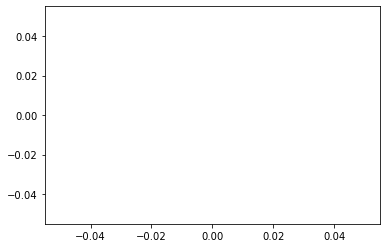

In [348]:
plt.plot(svc_model.loss)
plt.plot(svc_model.val_loss)
plt.show()

# Conclusion

In [376]:
cm_lr = confusion_matrix(Yt, Yp_lr)
cm_svc = confusion_matrix(Yt, np.where(Yp_svc==-1, 0, 1))

In [377]:
cmd_lr = ConfusionMatrixDisplay(cm_lr, display_labels=[0, 1])
cmd_svc = ConfusionMatrixDisplay(cm_svc, display_labels=[0, 1])

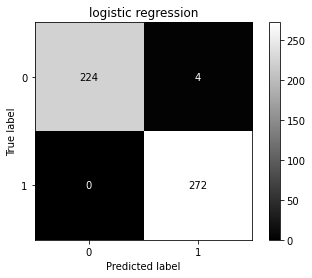

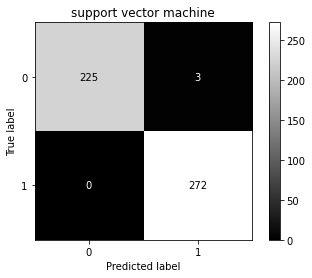

In [378]:
cmd_lr.plot(cmap='gray')
cmd_lr.ax_.set_title("logistic regression")

cmd_svc.plot(cmap='gray')
cmd_svc.ax_.set_title("support vector machine")

plt.show()